# Introduction to Machine Learning (CSCI-UA.473)

### Homework 1: Linear Models
#### Due: October 2nd, 2023 at 11:59PM


#### Name: Yiqi Rao
#### Email: yr2071@nyu.edu

### Z Disease Dataset

The Z dataset contains ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) and a quantitative measure of disease progression one year after baseline. Specifically, it comprises a total of 442 samples, where each sample has 10 input features and a target value representing the quantitative measure of disease Z progression.

In [70]:
from google.colab import drive
import pandas as pd

# Load the entire dataset from the CSV file
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/FML_Fall23_HW/HW1/FML2023_HW1_Dataset.csv')

# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values
feature_names = X.columns.tolist()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Question 1: Data Visualization (15 points)
**Task 1.1 (5 points):** Create a scatter plot to visualize the relationship between BMI (Body Mass Index) and disease Z progression.

* Analyze the scatter plot and describe whether there appears to be a positive or negative correlation, or if no clear correlation is evident.
* Can we confidently infer a person's disease Z status using BMI as the only input variable? Explain your reasoning and any potential caveats.

Text(0, 0.5, 'Disease Z Progrssion')

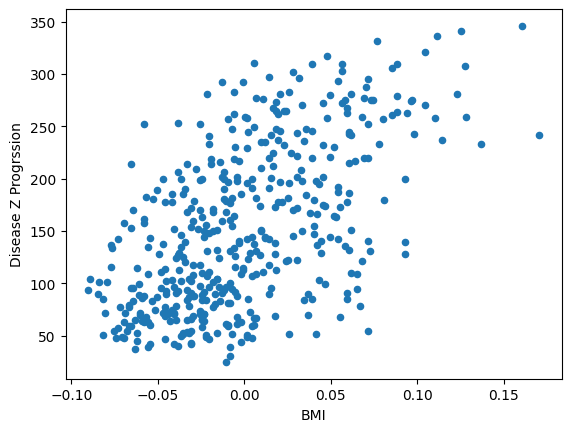

In [6]:
# Add code here
import matplotlib.pyplot as plt
data.plot.scatter(x='bmi', y='target')
plt.xlabel('BMI')
plt.ylabel('Disease Z Progrssion')

* There appears to be a positive correlation. \
* No, because the correlation seems rather weak, so to more confidently infer a person's disease Z status, we may combine BMI with other input variables.

**Task 1.2 (5 points):** Create a histogram to visualize the distribution of age among Z patients.

* Does the histogram reveal any noticeable peaks, clusters, or trends?

Text(0, 0.5, 'Numbers of Z Patients')

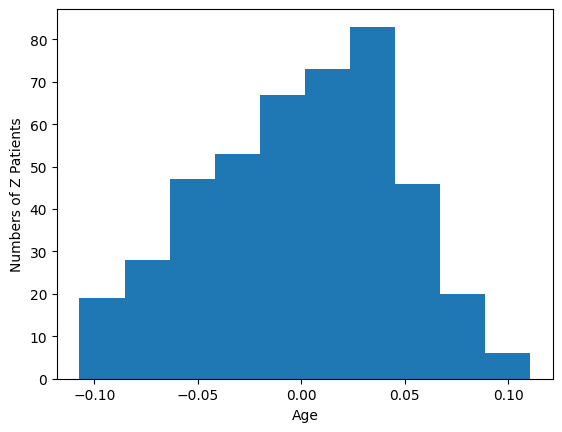

In [10]:
# Add code here
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Numbers of Z Patients')

* The histogram reveals a peak at 0.02 to 0.04, and a cluster around 0.00. Also the histogram skews to the left.

**Task 1.3 (5 points):** The box plot is a graphical representation that allows you to visually assess the distribution of values and identify potential differences between the two groups. If you're unfamiliar with box plots or need further guidance, you can refer to this [resource](https://www.data-to-viz.com/caveat/boxplot.html) on box plots for a detailed explanation and examples.

Construct a box plot to compare the progression of Z in male and female patients. How does the progression differ between males and females, as revealed by the box plot?

Text(0, 0.5, 'Disease Z Progression')

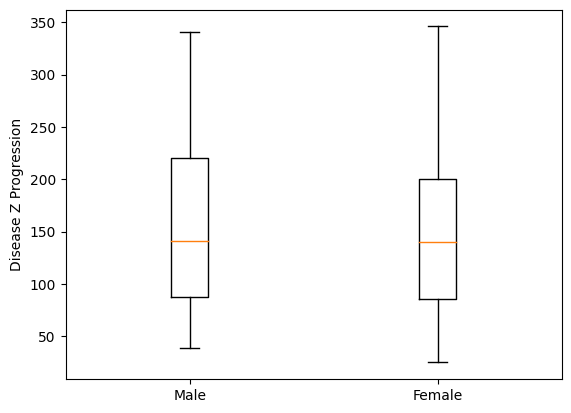

In [16]:
# Add code here
plt.boxplot([data.loc[data['sex'] > 0]['target'], data.loc[data['sex'] < 0]['target']],labels=['Male','Female'])
plt.ylabel('Disease Z Progression')

* Male pateients have progression of relatively smaller range and a higher 75-percentile. However, the differences are not significant.

### Question 2: Linear, Ridge, and Lasso Regression (8 points)

**Task 2.1 (2 points):** Split the dataset into training and testing sets (80/20\%) split.

In [34]:
# Add code here
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
X_train = train.drop('target',axis=1)
y_train = train['target']
X_test = test.drop('target',axis=1)
y_test = test['target']

**Task 2.2 (2 points):** Linear regression

A linear regression model is a linear function of the parameters of the model. Its output $y$ is a real number or a real vector, depending on the task definition. That is:
$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2$$


* $X_i = [X_1^{(1)}\ldots X_i^{(p)}]$
* $\beta_0,\ldots,\beta_p$ are the coefficients for the features.
* $x_{ji}$ represents the values of the j-th feature for the i-th observation.
* $y_i$ is the target value for the i-th observation.

In [35]:
# Add code for linear regression, you can use machine learning libraries.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

**Task 2.3 (2 points) :** Ridge Regression is a regularized linear regression with an added L2 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda \|\beta\|^2_2$$

* $\lambda$ is the regularization hyper-parameter.

In [36]:
# Add code for ridge regression, you can use machine learning libraries.
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

**Task 2.4 (2 points):** Lasso Regression is a regularized linear regression with an added L1 regularization term to the linear regression cost function.

$$\beta = \underset{\beta}{\text{argmin}}\sum_{i=1}^n\left(Y_i - X_i \beta\right)^2 + \lambda |\beta|$$

In [71]:
# Add code for lasso regression, you can use machine learning libraries.
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

### Question 3: Model Analysis (15 points)

**Task 3.1 (5 points):** Visualize the coefficients of the Linear, Ridge, and Lasso models.
- What will be the impact of increase in the strength of s1 in linear regression?
- Among the three models, which one exhibits a more pronounced reliance on the BMI feature?

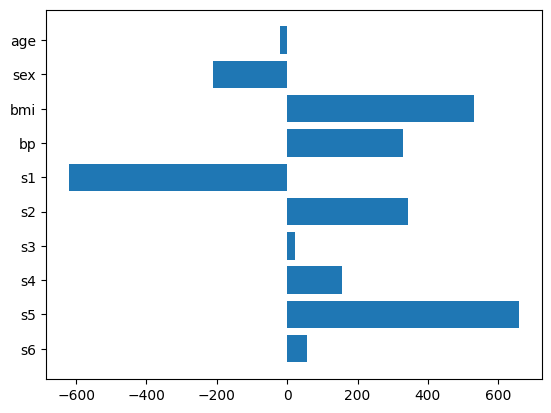

In [38]:
## Add code here
plt.barh(data.columns[:-1],linreg.coef_)
plt.gca().invert_yaxis()

* The increase of s1 will lower the precision of predictions given by linear regression

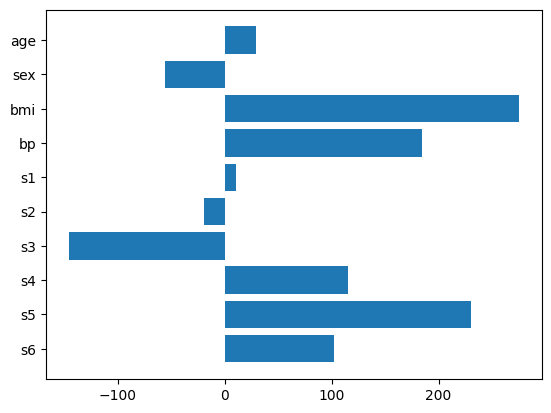

In [40]:
plt.barh(data.columns[:-1],ridge.coef_)
plt.gca().invert_yaxis()

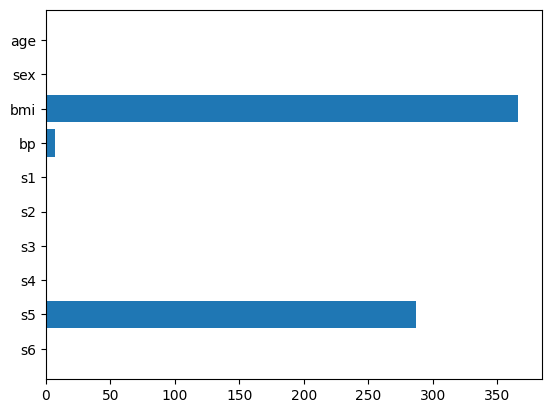

In [41]:
plt.barh(data.columns[:-1],lasso.coef_)
plt.gca().invert_yaxis()

* The Lasso regression model has more reliance on BMI, since it only depends on three variables.

**Task 3.2 (5 points):** Cross-validation involves dividing the available data into multiple subsets or folds to ensure that the model is evaluated on different parts of the data. This helps in obtaining a more accurate estimate of how the model would perform on unseen data. Compare the cross validation scores between Linear, Ridge, and Lasso regression models using a bar plot.

Text(0, 0.5, 'Cross Validation Scores')

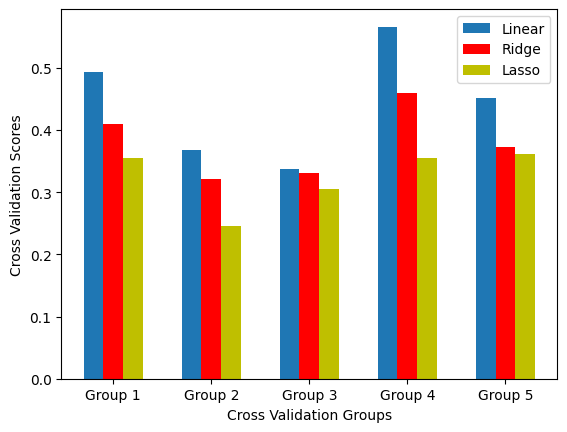

In [63]:
## Add code here
from sklearn.model_selection import cross_val_score
linregcvs = cross_val_score(linreg, X_train, y_train)
ridgecvs = cross_val_score(ridge, X_train, y_train)
lassocvs = cross_val_score(lasso, X_train, y_train)
loc = np.arange(5)
plt.bar(loc-0.2, linregcvs, width=0.2)
plt.bar(loc, ridgecvs, width=0.2, color='r')
plt.bar(loc+0.2, lassocvs, width=0.2, color='y')
plt.legend(['Linear','Ridge','Lasso'])
plt.xticks(loc, ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'])
plt.xlabel("Cross Validation Groups")
plt.ylabel("Cross Validation Scores")

* The Linear regression model has highest cross validation score, followed by Ridge and finally Lasso.

**Task 3.3 (5 points):** Conduct a grid search for both Lasso and Ridge regression models, and then visualize the differences in results obtained before and after the grid search using a bar plot.
- What are the obtained regularization strength parameters for both models?
- Did the grid search improve model performance?

The obtained regularization strength parameters for Ridge is  0.06  and for lasso is  0.01


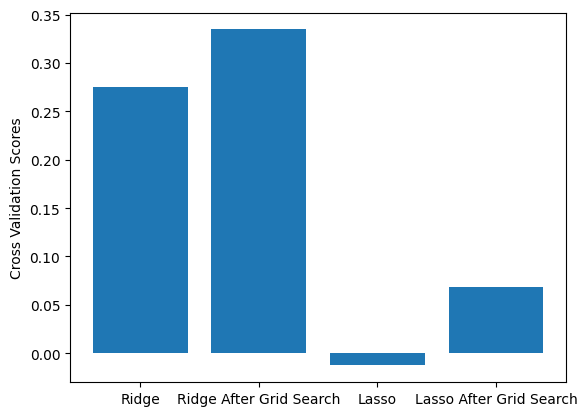

In [76]:
## Add code here
from sklearn.model_selection import GridSearchCV
hyperParameters = {'alpha':[0.01*i for i in range(1,101)]}
ridge = Ridge()
lasso = Lasso()
ridgeGrid = GridSearchCV(ridge, hyperParameters)
ridge.fit(X_train, y_train)
ridgeGrid.fit(X_train, y_train)
lassoGrid = GridSearchCV(lasso, hyperParameters)
lasso.fit(X_train, y_train)
lassoGrid.fit(X_train, y_train)

ridgescore = cross_val_score(ridge, X_train, y_train)
lassoscore = cross_val_score(lasso, X_train, y_train)
ridgeGridScore = ridgeGrid.best_score_
lassoGridScore = lassoGrid.best_score_
scores = [ridgescore.mean(), ridgeGridScore.mean(), lassoscore.mean(), lassoGridScore.mean()]

plt.bar(['Ridge', 'Ridge After Grid Search', 'Lasso', 'Lasso After Grid Search'], scores)
plt.ylabel('Cross Validation Scores')

print('The obtained regularization strength parameters for Ridge is ', ridgeGrid.best_params_['alpha'], ' and for lasso is ', lassoGrid.best_params_['alpha'])

* Yes, the grid search improves model performance.

### Question 4: Bias and Variance Tradeoff (12 points)

**Task 4.1 (5 points)** Describe the bias-variance tradeoff, how it affects model performance, and explain the relationship between model complexity and bias/variance. Use markdown cells for explanation.

**Task 4.2 (7 points):** Consider the Z dataset with input features X and target values y. Introduce polynomial features with degrees 1 to 8 to transform the input features into higher-degree polynomials.

To demonstrate the bias-variance tradeoff, fit regression models of to the transformed dataset. Then, create line plots where the x-axis represents the polynomial degrees, and the y-axis represents the Mean Squared Error (MSE) for both the training and testing datasets. Compare the errors between these models.


* A high bias and low varaince will result in high in-sample error and high out-of-sample error. On the other hand, a low bias and high variance will result in low in-sample error and high out-of sample error. As we increase the complexity of our model, we will fit more data, thus having a lower bias. However, for models with higher complexity, there will tend to be greater variance of our model.

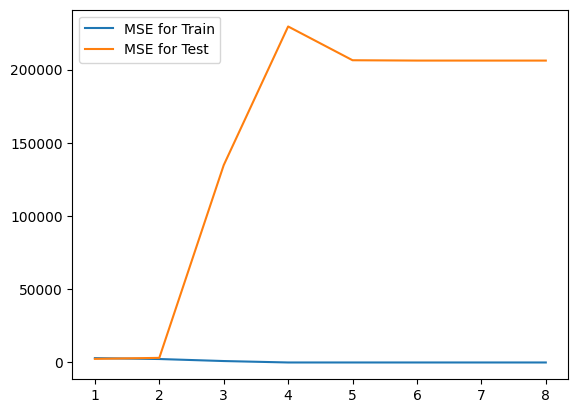

In [59]:
### Add code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

trainerror=[]
testerror=[]
for i in range(1,9):
  poly = PolynomialFeatures(degree=i)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)
  model = LinearRegression()
  model.fit(X_train_poly,y_train)
  y_train_predicted = model.predict(X_train_poly)
  y_test_predicted = model.predict(X_test_poly)
  trainerror.append(mean_squared_error(y_train, y_train_predicted))
  testerror.append(mean_squared_error(y_test, y_test_predicted))
plt.plot(range(1,9),trainerror,label="MSE for Train")
plt.plot(range(1,9),testerror,label="MSE for Test")
plt.legend()

* Models with degree of 1 and 2 will have significantly lower MSE compared with models with higher degree.

#### Z dataset (Classification)

For the last question, we will create a classification version of the Z dataset as follows:

Class 0: Denotes Z progression values that fall below the 50th percentile of the original target variable.

Class 1: Denotes Z progression values that surpass the 50th percentile of the original target variable.

In [62]:
# Shuffle the data
from sklearn.utils import shuffle
import numpy as np
X, y = shuffle(X, y, random_state=42)

# Create the target variable
y = np.where(y > np.percentile(y, 50), 1, 0)

### Question 5: Logistic Regression from Scratch (20 points)


**Task 5.1 (2 points):** Implement the sigmoid function.    
**Task 5.2 (7 points):** Initialize the weights and biases to zeros and implement gradient descent.   
**Task 5.3 (6 points):** Implement the predict and predict_proba functions:
  - predict returns a single discrete category corresponding to the class that has been predicted.
  - predict_proba returns continuous values that represent the likelihood of each input belonging to each class.

In [64]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        ### Implement the sigmoid function
        return 1/(1+np.exp(-z))

    def fit(self, X, y):
        ### Initialize the weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        # Gradient descent
        for _ in range(self.num_iterations):
            ### Implement gradient descent
            weighted_sum = np.dot(X, self.weights) + self.bias
            pred = self._sigmoid(weighted_sum)
            d_weight = (1/X.shape[1]) * np.dot(X.T, (pred-y))
            d_bias = np.mean(pred-y)
            self.weights = self.weights - self.learning_rate * d_weight
            self.bias = self.bias - self.learning_rate * d_bias

    def predict(self, X):
        ### Implement the predict function
        weighted_sum = np.dot(X, self.weights) + self.bias
        pred = self._sigmoid(weighted_sum)
        return np.where(pred > 0.5, 1, 0)

    def predict_proba(self, X):
        ### Implement the predict_proba function
        weighted_sum = np.dot(X, self.weights) + self.bias
        pred = self._sigmoid(weighted_sum)
        return pred

    def get_params(self, deep=True):
        return {
            "learning_rate": self.learning_rate,
            "num_iterations": self.num_iterations
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

**Task 5.4 (5 points):** Create an instance of a LogisticRegressionScratch model and train it using a new (80/20%) split of the classification dataset. Afterwards, calculate the accuracy, precision, recall, and F1 score (you can use available machine learning libraries).

In [68]:
### Add code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegressionScratch()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
accuracy = np.mean(y_test_pred == y_test)
precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')
f1 = f1_score(y_test, y_test_pred, average='binary')
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1)

Accuracy: 0.7303370786516854
Precision: 0.7368421052631579
Recall: 0.6666666666666666
F1 score: 0.7
